In [1]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# import pickle as pk
import numpy as np
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
dev = torch.device(device)
import torch.optim as optim
import sys, os
from tqdm import tqdm

import yaml
import matplotlib
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline
import yaml


# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline



cuda


In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sbi import utils
from sbi import analysis
from sbi import inference
from sbi.inference import SNPE, SNLE, SNRE, simulate_for_sbi, prepare_for_sbi




/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from tqdm import tqdm
import pickle as pk

ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_charm_truth/'
pos = 'rsd'
isim_array = np.arange(0,1800)
for ji in tqdm(range(len(isim_array))):
    isim = isim_array[ji]
    # saved_j = pk.load(open(ldir_stats + '/saved_stats_halos_' + str(isim) + '_CMASS.pk', 'rb'))
    try:
        # saved_j = pk.load(open(ldir_stats + '/saved_stats_halos_with_MASS_WEIGHTED_' + str(isim) + '_CMASS.pk', 'rb'))    
        saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_nbar_4en4.pk', 'rb'))    
        # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))    

        # Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:3][:,None]
        # Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:3][:,None]

        Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:2].T
        Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:2].T


        Bk_truth_k0p06 = saved_j[pos + '_Bk_truth_k0p06_weighted'][1:-1]
        Bk_mock_k0p06 = saved_j[pos + '_Bk_mock_k0p06_weighted'][1:-1]

        Bk_truth_k0p2 = saved_j[pos + '_Bk_truth_k0p2_weighted'][1:-1]
        Bk_mock_k0p2 = saved_j[pos + '_Bk_mock_k0p2_weighted'][1:-1]

        Bk_truth_k0p3 = saved_j[pos + '_Bk_truth_k0p3_weighted'][1:-1]
        Bk_mock_k0p3 = saved_j[pos + '_Bk_mock_k0p3_weighted'][1:-1]

        s0_mock = saved_j[pos + '_s0_mock_weighted']
        s0_truth = saved_j[pos + 's0_truth_weighted']

        s1_mock = saved_j[pos + '_s1_mock_weighted']
        s1_truth = saved_j[pos + 's1_truth_weighted']

        s2_mock = saved_j[pos + '_s2_mock_weighted']
        s2_truth = saved_j[pos + 's2_truth_weighted']

        # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s0_mock, s1_mock[::4], s2_mock[::6]))
        # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s0_truth, s1_truth[::4], s2_truth[::6]))

        summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::4], s2_mock[::6]))
        summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::4], s2_truth[::6]))


        # summary_concat_mock_all_weighted = np.concatenate((Pk_mock_ds.flatten(), s1_mock[::4], s2_mock[::6]))
        # summary_concat_truth_all_weighted = np.concatenate((Pk_truth_ds.flatten(), s1_truth[::4], s2_truth[::6]))


        # summary_concat_mock_all_weighted = Pk_mock_ds.flatten()
        # summary_concat_truth_all_weighted = Pk_truth_ds.flatten()


        # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))    

        # saved_j2 = pk.load(open(ldir_stats + '/saved_stats_MASS_WEIGHTED_halos_' + str(isim) + '_CMASS.pk', 'rb'))
        # saved_j['summary_concat_mock_all'] = summary_concat_mock_all
        # saved_j['summary_concat_truth_all'] = summary_concat_truth_all
        # saved_j['cosmo'] = cosmo
        if ji == 0:
            # x_all = saved_j['summary_concat_mock_all'][None,:]
            # x_all_truth = saved_j['summary_concat_truth_all'][None,:]            

            # x_all = saved_j[pos + '_summary_concat_mock_all_weighted'][None,:]
            # x_all_truth = saved_j[pos + '_summary_concat_truth_all_weighted'][None,:]            

            x_all = summary_concat_mock_all_weighted[None,:]
            x_all_truth = summary_concat_truth_all_weighted[None,:]            


            # x_all = saved_j[pos + '_Pk_mock_weighted'].flatten()[None,:]
            # x_all_truth = saved_j[pos + '_Pk_truth_weighted'].flatten()[None,:]            

            theta_all = saved_j['cosmo'][None,:]
        else:
            # x_new = saved_j['summary_concat_mock_all'][None,:]
            # x_new_truth = saved_j['summary_concat_truth_all'][None,:]      
            #       
            # x_new = saved_j[pos + '_summary_concat_mock_all_weighted'][None,:]
            # x_new_truth = saved_j[pos + '_summary_concat_truth_all_weighted'][None,:]         

            x_new = summary_concat_mock_all_weighted[None,:]
            x_new_truth = summary_concat_truth_all_weighted[None,:]         


            # x_all = np.concatenate((x_all, saved_j['summary_concat_mock_all'][None,:]), axis = 0)
            x_all = np.concatenate((x_all, x_new), axis = 0)       
            x_all_truth = np.concatenate((x_all_truth, x_new_truth), axis = 0)       
            theta_all = np.concatenate((theta_all, saved_j['cosmo'][None,:]), axis = 0)
        
    except:
        pass




100%|██████████| 1800/1800 [00:40<00:00, 44.50it/s]


In [4]:
# # Pk_mock_ds.shape
# pl.figure()
# pl.plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_ds[0], label = 'mock')
# pl.plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_ds[1], label = 'mock')

# pl.plot(saved_j[pos + '_k_Pk_weighted'], Pk_truth_ds[0], ls='--', label = 'mock')
# pl.plot(saved_j[pos + '_k_Pk_weighted'], Pk_truth_ds[1], ls='--', label = 'mock')

# pl.yscale('log')



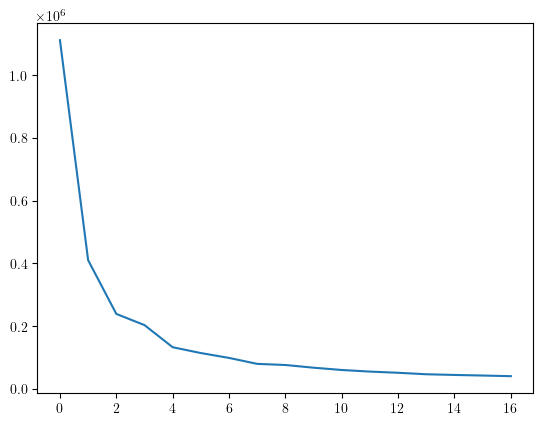

In [24]:
# len(Pk_mock_ds.flatten()) + len(Bk_mock_k0p06)
pl.figure()
pl.plot(x_all[0,:len(Pk_mock_ds.flatten())], label = 'mock')




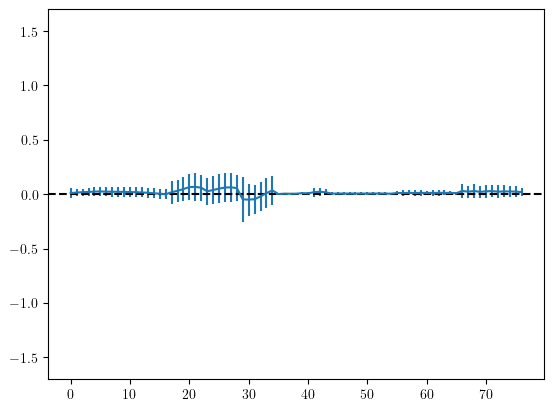

In [25]:
x_all_diff = (x_all - x_all_truth)/x_all_truth
x_all_diff_std = np.std(x_all_diff, axis = 0)
x_all_diff_mean = np.mean(x_all_diff, axis = 0)


pl.figure()
pl.errorbar(np.arange(0, x_all_diff_mean.shape[0]), x_all_diff_mean, yerr = x_all_diff_std)
pl.ylim(-1.7, 1.7)
pl.axhline(0.0,ls='--', color='k')




/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/mnt/home/spandey/miniconda3/envs/ili-sbi/lib/python3.10/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


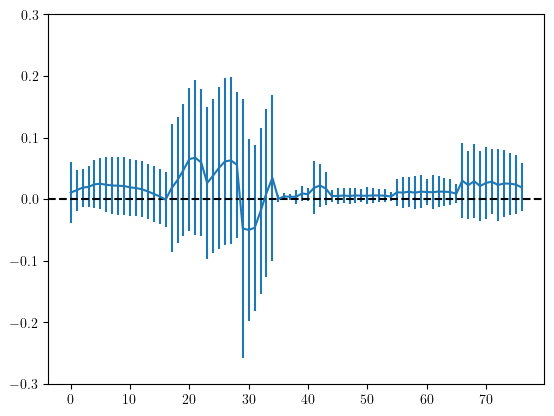

In [26]:
x_all_diff = (x_all - x_all_truth)/x_all_truth
x_all_diff_mean = np.mean(x_all_diff, axis = 0)
x_all_diff_std = np.std(x_all_diff, axis = 0)

pl.figure()
pl.errorbar(np.arange(0, x_all_diff.shape[1]), np.mean(x_all_diff[:1800,:], axis = 0), yerr = np.std(x_all_diff[:1800,:], axis = 0))
pl.errorbar(np.arange(0, x_all_diff.shape[1]), np.mean(x_all_diff[1800:,:], axis = 0), yerr = np.std(x_all_diff[1800:,:], axis = 0))
pl.ylim(-0.3, 0.3)
pl.axhline(0.0,ls='--', color='k')




In [5]:
# x_all.shape, theta_all.shape
# saved_j['summary_concat_mock_all']
x_all_std = np.std(x_all, axis = 0)
x_all_mean = np.mean(x_all, axis = 0)
theta_all_std = np.std(theta_all, axis = 0)
theta_all_mean = np.mean(theta_all, axis = 0)




In [82]:
# np.mean(theta_all)
# x_all.shape
# x_all.shape
# ji = 50
# pl.figure()
# pl.plot(np.arange(x_all.shape[1]), np.std(x_all, axis = 0))
# x


In [6]:
# only infer Om and sig8
indsel_p = [0, 4]
# indsel_p = [0, 1, 2, 3, 4]



In [7]:
# x_all = torch.tensor(x_all).float()
# theta_all = torch.tensor(theta_all).float()
x_all = torch.Tensor((x_all - x_all_mean)/x_all_std).float()
# x_all = torch.Tensor((x_all)/x_all_std).float()
theta_all = torch.Tensor((theta_all - theta_all_mean)/theta_all_std).float()[:, indsel_p]






In [8]:
theta_all_std = theta_all_std[indsel_p]
theta_all_mean = theta_all_mean[indsel_p]



In [10]:
prior = utils.BoxUniform(
    low=(torch.tensor((np.array([0.1, 0.03, 0.5, 0.8, 0.6])[indsel_p]  - theta_all_mean)/theta_all_std)), 
    high=torch.tensor((np.array([0.5, 0.07, 0.9, 1.2, 1.0])[indsel_p] - theta_all_mean)/theta_all_std)
)

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=25, num_transforms=5
# )

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=15, num_transforms=4
# )

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=50, num_transforms=5
# )

# neural_posterior = utils.posterior_nn(
#     model="maf", hidden_features=30, num_transforms=3
# )


neural_posterior = utils.posterior_nn(
    model="maf", hidden_features=20, num_transforms=10
)



# setup the inference procedure with the SNPE-C procedure
inference = SNPE(prior=prior, density_estimator=neural_posterior)
# inference = SNLE(prior=prior, density_estimator=neural_posterior)





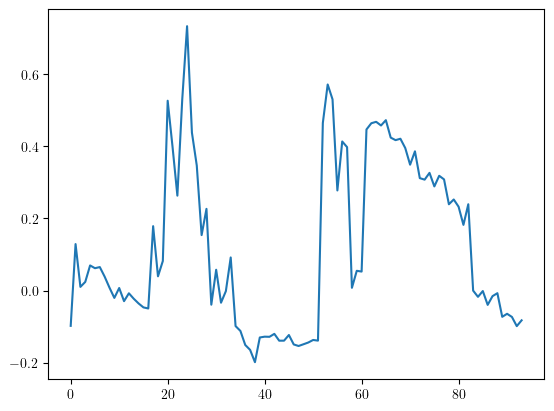

In [238]:
ji = 50
pl.figure()
# pl.plot(np.arange(x_all.shape[1]), np.std(x_all, axis = 0))
pl.plot(np.arange(x_all.shape[1]), x_all[ji, :])




In [239]:
theta_all.shape, x_all.shape



(torch.Size([1800, 2]), torch.Size([1800, 94]))

In [11]:
# inference = SNPE(prior=prior, density_estimator=neural_posterior)
# density_estimator = inference.append_simulations(theta_all, x_all).train()
# posterior = inference.build_posterior(density_estimator)
# posterior = inference.build_posterior(density_estimator)

# inferer = SNLE(prior, density_estimator="maf")
inferer = SNRE(prior)
inferer = inferer.append_simulations(theta_all, x_all)
likelihood_estimator = inferer.train()
posterior = inferer.build_posterior(mcmc_method="slice_np_vectorized", 
                                    mcmc_parameters=dict(thin=1))




 Neural network successfully converged after 54 epochs.slice_np_vectorized


In [35]:
isim_obs_array = np.arange(1800, 1810)  
# isim_obs_array = np.arange(1800, 1900)  
# isim_obs_array = np.arange(1000, 1020)  
# isim_obs_array = np.arange(600, 630)
# isim_obs_array = np.arange(430, 460)
# isim_obs_array = np.arange(900, 925)

Om_true_all = np.zeros(len(isim_obs_array))
Om_mock_all_mean = np.zeros(len(isim_obs_array))
Om_mock_all_std = np.zeros(len(isim_obs_array))

sig8_true_all = np.zeros(len(isim_obs_array))
sig8_mock_all_mean = np.zeros(len(isim_obs_array))
sig8_mock_all_std = np.zeros(len(isim_obs_array))

samples_all_isims = np.zeros((len(isim_obs_array), 1000, len(indsel_p)))
true_all_isims = np.zeros((len(isim_obs_array), len(indsel_p)))

for ji in range(len(isim_obs_array)):
    print(ji)
    isim_obs = isim_obs_array[ji]

    # saved_j = pk.load(open(ldir_stats + '/saved_stats_halos_' + str(isim_obs) + '_CMASS.pk', 'rb'))
    # x_obs = saved_j['summary_concat_truth_all'][None,:]
        
    # saved_j = pk.load(open(ldir_stats + '/saved_stats_halos/_with_MASS_WEIGHTED_' + str(isim_obs) + '_CMASS.pk', 'rb'))    
    saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim_obs) + '_nbar_4en4.pk', 'rb'))    
    # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim_obs) + '_lgMmin_13p0.pk', 'rb'))    

    # Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:2]
    # Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:2]

    # Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:1][:,None]
    # Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:1][:,None]

    Pk_mock_ds = saved_j[pos + '_Pk_mock_weighted'][:,:2].T
    Pk_truth_ds = saved_j[pos + '_Pk_truth_weighted'][:,:2].T

    Bk_truth_k0p06 = saved_j[pos + '_Bk_truth_k0p06_weighted'][1:-1]
    Bk_mock_k0p06 = saved_j[pos + '_Bk_mock_k0p06_weighted'][1:-1]

    Bk_truth_k0p2 = saved_j[pos + '_Bk_truth_k0p2_weighted'][1:-1]
    Bk_mock_k0p2 = saved_j[pos + '_Bk_mock_k0p2_weighted'][1:-1]

    Bk_truth_k0p3 = saved_j[pos + '_Bk_truth_k0p3_weighted'][1:-1]
    Bk_mock_k0p3 = saved_j[pos + '_Bk_mock_k0p3_weighted'][1:-1]

    s0_mock = saved_j[pos + '_s0_mock_weighted']
    s0_truth = saved_j[pos + 's0_truth_weighted']

    s1_mock = saved_j[pos + '_s1_mock_weighted']
    s1_truth = saved_j[pos + 's1_truth_weighted']

    s2_mock = saved_j[pos + '_s2_mock_weighted']
    s2_truth = saved_j[pos + 's2_truth_weighted']  

    # x_obs = saved_j[pos + '_summary_concat_truth_all_weighted'][None,:]            
    # x_obs = saved_j[pos + '_summary_concat_mock_all_weighted'][None,:]                

    x_obs = np.concatenate((Pk_truth_ds.flatten(), Bk_truth_k0p06, Bk_truth_k0p2, Bk_truth_k0p3, s1_truth[::4], s2_truth[::6]))
    # x_obs = np.concatenate((Pk_mock_ds.flatten(), Bk_mock_k0p06, Bk_mock_k0p2, Bk_mock_k0p3, s1_mock[::4], s2_mock[::6]))
    # x_obs = np.concatenate((Pk_mock_ds.flatten(), s1_mock[::4], s2_mock[::6]))
    # x_obs = np.concatenate((Pk_truth_ds.flatten(), s1_truth[::4], s2_truth[::6]))    
    # x_obs = Pk_truth_ds.flatten()


    # x_obs = saved_j[pos + '_Pk_truth_weighted'].flatten()[None,:]                
    theta_obs = saved_j['cosmo'][None,indsel_p]

    x_obs = torch.tensor((x_obs - x_all_mean)/x_all_std).float()
    # x_obs = torch.tensor((x_obs)/x_all_std).float()    
    theta_obs = torch.tensor((theta_obs  - theta_all_mean)/theta_all_std).float()

    samples = posterior.set_default_x(x_obs).sample((1000,))

    samples_all = samples.cpu().numpy()

    samples_all_isims[ji] = samples_all
    true_all_isims[ji] = theta_obs.cpu().numpy()
    print(theta_obs.cpu().numpy())

    theta_obs_transformed = ((theta_obs.cpu().numpy() * theta_all_std) + theta_all_mean)
    Om_true_all[ji] = theta_obs_transformed[0,0]
    # sig8_true_all[ji] = theta_obs_transformed[0,4]
    sig8_true_all[ji] = theta_obs_transformed[0,1]


    # samples_all_transformed = ((samples_all * theta_all_std) + theta_all_mean)
    samples_all_transformed = ((samples_all * theta_all_std) + theta_all_mean)

    Om_mock_all_mean[ji] = np.mean(samples_all_transformed[:,0])
    Om_mock_all_std[ji] = np.std(samples_all_transformed[:,0])

    # sig8_mock_all_mean[ji] = np.mean(samples_all_transformed[:,4])
    # sig8_mock_all_std[ji] = np.std(samples_all_transformed[:,4])

    sig8_mock_all_mean[ji] = np.mean(samples_all_transformed[:,1])
    sig8_mock_all_std[ji] = np.std(samples_all_transformed[:,1])




0
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:08<00:00, 122.93it/s]


[[-1.4185967 -1.3674268]]
1
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:07<00:00, 135.56it/s]


[[-1.1320462 -0.5465023]]
2
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:07<00:00, 128.57it/s]


[[ 0.2381862  -0.74303716]]
3
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:07<00:00, 127.92it/s]


[[ 0.9467475 -1.3100317]]
4
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:07<00:00, 131.08it/s]


[[0.7904472 0.9179436]]
5
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:07<00:00, 127.72it/s]


[[-1.1198896  1.667559 ]]
6
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:08<00:00, 119.55it/s]


[[1.6188387 0.6344463]]
7
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:08<00:00, 123.49it/s]


[[1.6987255 1.5597256]]
8
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:08<00:00, 121.92it/s]


[[ 0.48131996 -1.6596203 ]]
9
slice_np_vectorized






















































Running vectorized MCMC with 1 chains: 100%|██████████| 1010/1010 [00:08<00:00, 124.99it/s]

[[ 0.6306736  -0.78303987]]


In [32]:
# true_all_isims


In [29]:
Om_mock_all_mean


array([0.1330295 , 0.21804205, 0.30429334, 0.34917194, 0.39183351,
       0.19364763, 0.        , 0.        , 0.        , 0.        ])

In [34]:
# theta_obs.shape
true_all_isims
# samples_all_isims[23,:]


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [24]:
import tarp
references = "random"
metric = 'euclidean'
bootstrap= True
norm = True
num_alpha_bins = None
num_bootstrap = 20

# samples_all_tarp = np.moveaxis(samples_all_isims, 0, 1)[:,:71, :]
# true_all_tarp = true_all_isims[:71,...]

samples_all_tarp = np.moveaxis(samples_all_isims, 0, 1)
true_all_tarp = true_all_isims

ecp, alpha = tarp.get_tarp_coverage(
            samples_all_tarp, true_all_tarp,
            references=references, metric=metric,
            norm=norm, bootstrap=bootstrap,
            num_alpha_bins=num_alpha_bins,
            num_bootstrap=num_bootstrap
        )





100%|██████████| 20/20 [00:00<00:00, 1041.69it/s]


Text(0.5, 0, 'Credibility Level')

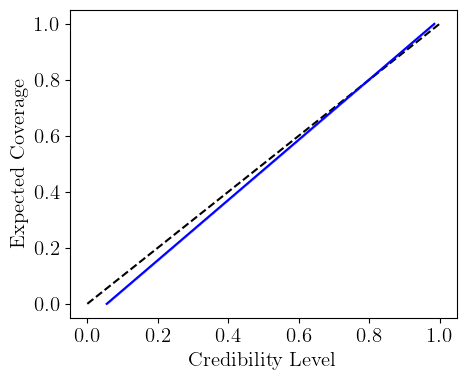

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot([0, 1], [0, 1], ls='--', color='k')
if bootstrap:
    ecp_mean = np.mean(ecp, axis=0)
    ecp_std = np.std(ecp, axis=0)
    ax.plot(alpha, ecp_mean, label='TARP', color='b')
    ax.fill_between(alpha, ecp_mean - ecp_std, ecp_mean + ecp_std,
                    alpha=0.2, color='b')
    ax.fill_between(alpha, ecp_mean - 2 * ecp_std, ecp_mean + 2 * ecp_std,
                    alpha=0.2, color='b')
else:
    ax.plot(alpha, ecp, label='TARP')
# ax.legend()
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)
ax.set_ylabel("Expected Coverage", size=15)
ax.set_xlabel("Credibility Level", size=15)
# pl.savefig('/mnt/home/spandey/ceph/AR_NPE/notebooks/CMASS_TEST/run_inference_scripts/results/TARP_coverage.pdf', bbox_inches='tight')


Text(0, 0.5, '$\\Omega_m$ inferred')

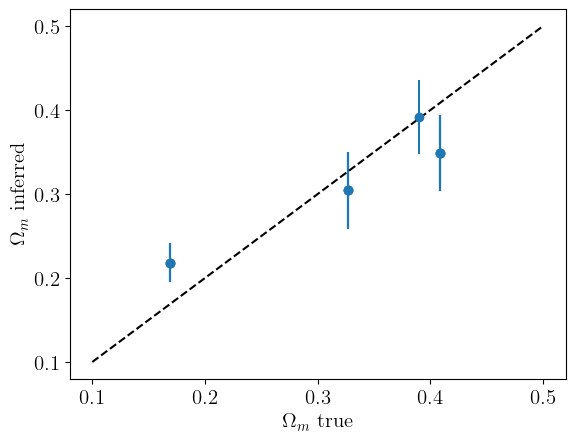

In [26]:
# samples_all_tarp.shape, true_all_tarp.shape
# true_all_tarp_repeat = np.tile(true_all_tarp, (1000, 1, 1))

samples_all_transformed = ((samples_all_tarp * theta_all_std) + theta_all_mean)
true_all_transformed = ((true_all_tarp * theta_all_std) + theta_all_mean)
samples_all_tarp_mean = np.mean(samples_all_transformed, axis = 0)
samples_all_tarp_std = np.std(samples_all_transformed, axis = 0)

pl.figure()
pl.errorbar(true_all_transformed[:,0], samples_all_tarp_mean[:,0], yerr = samples_all_tarp_std[:,0], fmt = 'o')
pl.plot([0.1, 0.5], [0.1, 0.5], 'k--')
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)


pl.xlabel(r'$\Omega_m$ true', size=15)
pl.ylabel(r'$\Omega_m$ inferred', size=15)





In [27]:
# true_all_transformed
# true_all_tarp

Text(0, 0.5, '$\\sigma_8$ inferred')

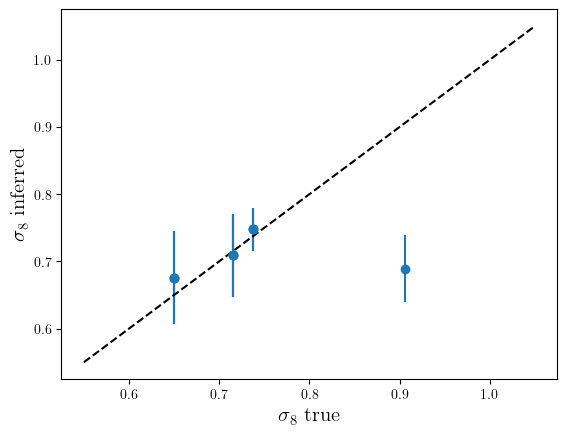

Running vectorized MCMC with 1 chains:  10%|▉         | 100/1010 [00:18<00:09, 91.07it/s]

In [28]:
pl.figure()
pl.errorbar(true_all_transformed[:,-1], samples_all_tarp_mean[:,-1], yerr = samples_all_tarp_std[:,-1], fmt = 'o')
pl.plot([0.55, 1.05], [0.55, 1.05], 'k--')
pl.xlabel(r'$\sigma_8$ true', size=15)
pl.ylabel(r'$\sigma_8$ inferred', size=15)




In [249]:
sdir_cosmo = '/mnt/home/spandey/ceph/Quijote/data_NGP_self_LH'
jsim = 0
mass_type = 'rockstar200c'
lgMmincutstr = '5e12'
nside_h = 128
z_inference = '0.5'
fname = sdir_cosmo + '/' + str(jsim) + '/SPARSEMATS_halos_HR_rockstar_200c_lgMmincut_5e12_subvol_res_128_z=0.5.pk'


df_h = pk.load(open(fname, 'rb'))



In [250]:
vel_type='diff'
df_Mh_all, df_Nh_all, df_v_all = df_h['M_halos'], df_h['N_halos'], df_h[f'v_halos_{vel_type}']



In [262]:
np.amax(df_Mh_all.todense())


14.9889554977417

In [50]:
import pickle as pk
ldir = '/mnt/home/spandey/ceph/CHARM/results/'
# fname = ldir + 'saved_tarp_real_Pk_mono_SNRE.pk'
# fname = ldir + 'saved_tarp_rsd_Pk_quad_SNRE.pk'
fname = ldir + 'saved_tarp_rsd_Pk_all_SNRE.pk'
df = pk.load(open(fname, 'rb'))




In [51]:
samples_all_tarp = df['samples_all_tarp']
true_all_tarp = df['true_all_tarp']
samples_all_transformed = df['samples_all_transformed']
true_all_transformed = df['true_all_transformed']
samples_all_tarp_mean = df['samples_all_tarp_mean']
samples_all_tarp_std = df['samples_all_tarp_std']




In [52]:
Om_min = 0.13
Om_max = 0.47
sig8_min = 0.63
sig8_max = 0.97

indsel = np.where((true_all_transformed[:,0] > Om_min) & (true_all_transformed[:,0] < Om_max) & (true_all_transformed[:,1] > sig8_min) & (true_all_transformed[:,1] < sig8_max))[0] 




In [53]:
import tarp
references = "random"
metric = 'euclidean'
bootstrap= True
norm = True
num_alpha_bins = None
num_bootstrap = 20


ecp, alpha = tarp.get_tarp_coverage(
            samples_all_tarp[:,indsel, :], true_all_tarp[indsel,:],
            references=references, metric=metric,
            norm=norm, bootstrap=bootstrap,
            num_alpha_bins=num_alpha_bins,
            num_bootstrap=num_bootstrap
        )
        



100%|██████████| 20/20 [00:00<00:00, 189.65it/s]


Text(0.5, 0.98, 'Redshift space; $P_{\\ell = 0}$ + $P_{\\ell = 1}$ + $P_{\\ell = 2}$ + B + Wavelets; SNRE')

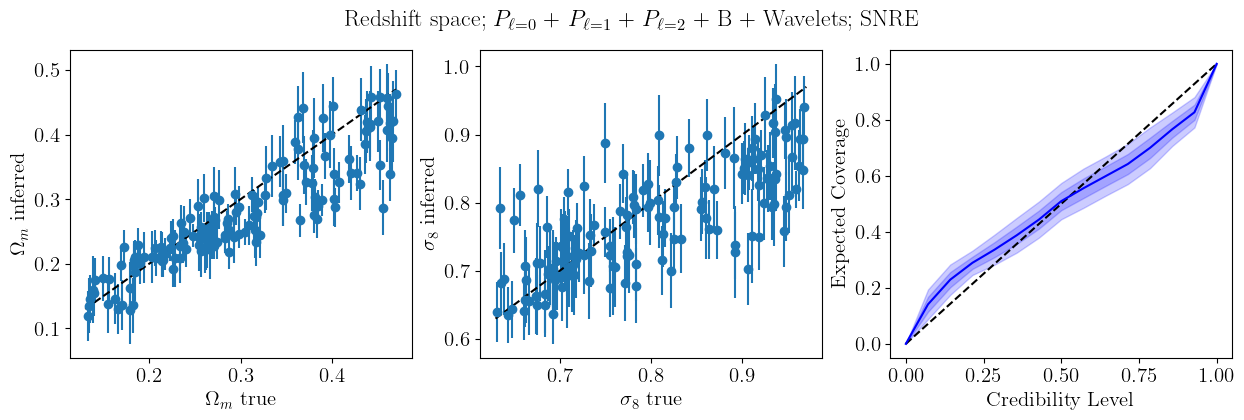

In [55]:
# pl.figure()
# pl.errorbar(true_all_transformed[:,-1], samples_all_tarp_mean[:,-1], yerr = samples_all_tarp_std[:,-1], fmt = 'o')
# pl.plot([0.55, 1.05], [0.55, 1.05], 'k--')
# pl.xlabel(r'$\sigma_8$ true', size=15)
# pl.ylabel(r'$\sigma_8$ inferred', size=15)

# two pane figure: Om and sig8
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].errorbar(true_all_transformed[indsel,0], samples_all_tarp_mean[indsel,0], yerr = samples_all_tarp_std[indsel,0], fmt = 'o')
ax[0].plot([Om_min, Om_max], [Om_min, Om_max], 'k--')
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].tick_params(axis='both', which='minor', labelsize=15)
ax[0].set_xlabel(r'$\Omega_m$ true', size=15)
ax[0].set_ylabel(r'$\Omega_m$ inferred', size=15)

ax[1].errorbar(true_all_transformed[indsel,-1], samples_all_tarp_mean[indsel,-1], yerr = samples_all_tarp_std[indsel,-1], fmt = 'o')
ax[1].plot([sig8_min, sig8_max], [sig8_min, sig8_max], 'k--')
ax[1].set_xlabel(r'$\sigma_8$ true', size=15)
ax[1].set_ylabel(r'$\sigma_8$ inferred', size=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='minor', labelsize=15)

ax = ax[2]
ax.plot([0, 1], [0, 1], ls='--', color='k')
if bootstrap:
    ecp_mean = np.mean(ecp, axis=0)
    ecp_std = np.std(ecp, axis=0)
    ax.plot(alpha, ecp_mean, label='TARP', color='b')
    ax.fill_between(alpha, ecp_mean - ecp_std, ecp_mean + ecp_std,
                    alpha=0.2, color='b')
    ax.fill_between(alpha, ecp_mean - 2 * ecp_std, ecp_mean + 2 * ecp_std,
                    alpha=0.2, color='b')
else:
    ax.plot(alpha, ecp, label='TARP')
# ax.legend()
pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)
ax.set_ylabel("Expected Coverage", size=15)
ax.set_xlabel("Credibility Level", size=15)

# plt.suptitle('Real space; P + B + Wavelets; SNRE', size=17)
# plt.suptitle(r'Redshift space; $P_{\ell = 0}$ + B + Wavelets; SNRE', size=17)
# plt.suptitle(r'Redshift space; $P_{\ell = 0}$ + $P_{\ell = 1}$ + B + Wavelets; SNRE', size=17)
plt.suptitle(r'Redshift space; $P_{\ell = 0}$ + $P_{\ell = 1}$ + $P_{\ell = 2}$ + B + Wavelets; SNRE', size=17)


